In [134]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

tesla_data = pd.read_csv('TSLA.csv')
tesla_data.shape
#shows amounts of rows and colums

(1258, 7)

In [135]:
tesla_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,211.278026,215.677649,206.640361,211.476779,211.476779,4.448228e+07
std,251.993545,256.900859,246.754253,252.257149,252.257149,3.027844e+07
min,36.220001,36.945999,35.397999,35.793999,35.793999,9.800600e+06
25%,57.447501,58.895501,56.475000,57.803000,57.803000,2.476140e+07
50%,68.214000,69.441001,67.023999,68.227001,68.227001,3.496350e+07
75%,298.901008,306.807007,292.149994,299.037986,299.037986,5.211238e+07
max,895.500000,910.000000,890.960022,909.679993,909.679993,3.046940e+08


In [136]:
tesla_data.values

array([['2016-10-25', 40.580002, 40.938, ..., 40.467999, 40.467999,
        12225000],
       ['2016-10-26', 40.200001, 40.638, ..., 40.448002, 40.448002,
        28164000],
       ['2016-10-27', 42.268002, 42.740002, ..., 40.801998, 40.801998,
        65468500],
       ...,
       ['2021-10-20', 865.349976, 869.48999, ..., 865.799988, 865.799988,
        14032100],
       ['2021-10-21', 856.0, 900.0, ..., 894.0, 894.0, 31481500],
       ['2021-10-22', 895.5, 910.0, ..., 909.679993, 909.679993,
        22836800]], dtype=object)

<AxesSubplot:xlabel='Date', ylabel='Close'>

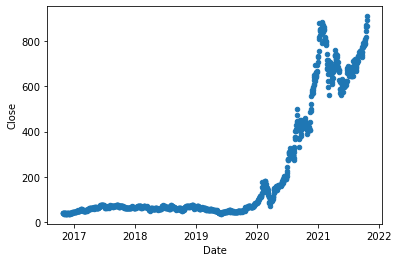

In [137]:
#Definerer input og output
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data['date_delta'] = (tesla_data['Date'] - tesla_data['Date'].min())  / np.timedelta64(1,'D')
X = pd.DataFrame(tesla_data['date_delta'])
y = pd.DataFrame(tesla_data['Close'])

tesla_data.plot.scatter(x = 'Date', y = 'Close')

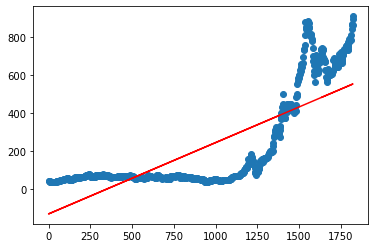

MSE = 24898.246354922157


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
close_pred = linear_regressor.predict(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train, close_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_train,close_pred)))

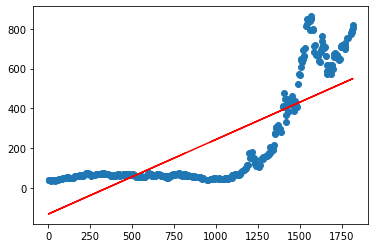

MSE = 23192.104460662515


In [139]:
close_pred = linear_regressor.predict(X_test)
plt.scatter(X_test,y_test)
plt.plot(X_test, close_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,close_pred)))

In [146]:
predictions = linear_regressor.predict(np.array(1900).reshape(1,-1))

print(predictions[0][0])
print("Actual price: 909")

581.8717507605738
Actual price: 909


In [149]:
predictions = linear_regressor.predict(np.array(1500).reshape(1,-1))
predictions

array([[431.74134495]])